# Wizualizacje

In [1]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
import pandas as pd
from pyspark.sql.functions import expr
import numpy as np



appName= "hive_pyspark"
master= "local[2]"
spark = SparkSession.builder.master(master).appName(appName).enableHiveSupport().getOrCreate()

23/01/09 12:09:12 WARN util.Utils: Your hostname, node1 resolves to a loopback address: 127.0.0.1; using 10.0.2.15 instead (on interface enp0s3)
23/01/09 12:09:12 WARN util.Utils: Set SPARK_LOCAL_IP if you need to bind to another address
23/01/09 12:09:13 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:

df_rodz_paliwa=spark.sql("""
    select 
        COUNT(*) as liczba_pojazdow,
        rodzaj_paliwa
    from 
        mytable
    group by 
        rodzaj_paliwa
    order by 
        liczba_pojazdow DESC
    """).toPandas()

In [3]:
df_rodz_paliwa

,liczba_pojazdow,rodzaj_paliwa
0,189296,BENZYNA
1,149097,OLEJ NAPEDOWY
2,23151,None
3,986,ENERGIA ELEKTRYCZNA
4,561,NIE DOTYCZY
5,194,MIESZANKA (PALIWO-OLEJ)
6,163,GAZ ZIEMNY SPREZONY (METAN)
7,42,INNE
8,40,GAZ ZIEMNY SKROPLONY (METAN)
9,6,GAZ PLYNNY (PROPAN-BUTAN)


In [4]:
df_rodz_paliwa["rodzaj_paliwa"][2] = "NIE SPRECYZOWANO"

/tmp/ipykernel_11134/3989722112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rodz_paliwa["rodzaj_paliwa"][2] = "NIE SPRECYZOWANO"


In [5]:
df_rodz_paliwa

,liczba_pojazdow,rodzaj_paliwa
0,189296,BENZYNA
1,149097,OLEJ NAPEDOWY
2,23151,NIE SPRECYZOWANO
3,986,ENERGIA ELEKTRYCZNA
4,561,NIE DOTYCZY
5,194,MIESZANKA (PALIWO-OLEJ)
6,163,GAZ ZIEMNY SPREZONY (METAN)
7,42,INNE
8,40,GAZ ZIEMNY SKROPLONY (METAN)
9,6,GAZ PLYNNY (PROPAN-BUTAN)


In [6]:
import matplotlib.pyplot as plt

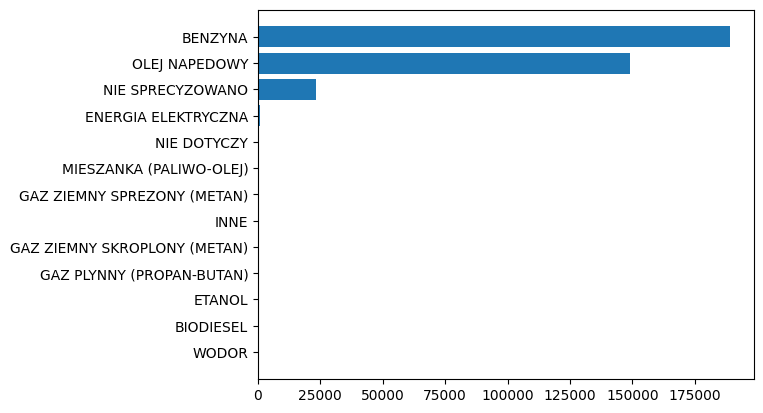

In [7]:
plt.barh(df_rodz_paliwa["rodzaj_paliwa"], df_rodz_paliwa["liczba_pojazdow"])
plt.gca().invert_yaxis()

In [8]:
from pyspark.sql.functions import expr
df_marka=spark.sql("""
    select 
        COUNT(*) as liczba_pojazdow,
        marka
    from 
        mytable
    group by 
        marka
    order by 
        liczba_pojazdow DESC
    """).toPandas()

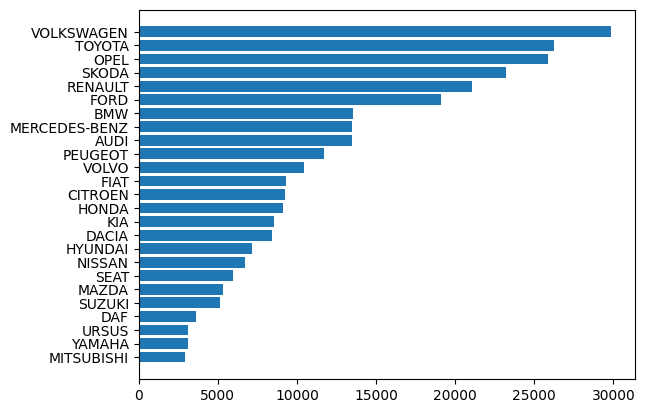

In [9]:
df_marka.head(30)
plt.barh(df_marka.head(25)["marka"], df_marka.head(25)["liczba_pojazdow"])
plt.gca().invert_yaxis()

In [11]:
import hbspark
from pyspark.sql import SparkSession

spark_session = SparkSession.builder.appName('Reading HBase').master('local[2]').getOrCreate()
hbspark.connect('127.0.0.1', spark_session)
BDM_df = hbspark.table("BDM2").scan().toPandas()

23/01/09 12:11:15 WARN util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [12]:
zagraniczne = BDM_df[['rowkey', 'handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_']]

In [13]:
zagraniczne['handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_'] =  zagraniczne['handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_'].astype(float)

/tmp/ipykernel_11134/3830502452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zagraniczne['handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_'] =  zagraniczne['handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_'].astype(float)


In [14]:
zagraniczne['miesiac'] = zagraniczne['rowkey'].map(lambda x: x.split('_')[1]).astype(int) 
zagraniczne['rok'] = zagraniczne['rowkey'].map(lambda x: x.split('_')[0]).astype(int) 

BDM_df['rok'] = BDM_df['rowkey'].map(lambda x: x.split('_')[0]).astype(int)
BDM_df['miesiac'] = BDM_df['rowkey'].map(lambda x: x.split('_')[1]).astype(int)

przecietne_wynagordzenie = BDM_df[['rok', 'miesiac', 'wynagrodzenia_i_swiadczenia_spoleczne:Przecietne_miesieczne_nominalne_wynagrodzenie_brutto_w_sektorze_przedsiebiorstw__zl_']]

/tmp/ipykernel_11134/493432736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zagraniczne['miesiac'] = zagraniczne['rowkey'].map(lambda x: x.split('_')[1]).astype(int)
/tmp/ipykernel_11134/493432736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zagraniczne['rok'] = zagraniczne['rowkey'].map(lambda x: x.split('_')[0]).astype(int)


In [15]:
from pyspark.sql.functions import expr
df_rodzaj_paliwa_ben=spark.sql("""
    select 
        COUNT(*) as liczba_pojazdow_benzynowych,
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac
    from 
        mytable
    where 
        rodzaj_paliwa == 'BENZYNA' 
    group by 
        rok, miesiac
    """).toPandas()
df_rodzaj_olej=spark.sql("""
    select 
        COUNT(*) as liczba_pojazdow_olejowych,
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac
    from 
        mytable
    where 
        rodzaj_paliwa =='OLEJ NAPEDOWY' 
    group by 
        rok, miesiac
    """).toPandas()
df_rodzaj_paliwa_ene=spark.sql("""
    select 
        COUNT(*) as liczba_pojazdow_energ,
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac
    from 
        mytable
    where 
         rodzaj_paliwa == 'ENERGIA ELEKTRYCZNA'
    group by 
        rok, miesiac
    """).toPandas()

df_rodzaj_paliwa = pd.concat([df_rodzaj_paliwa_ben, df_rodzaj_olej, df_rodzaj_paliwa_ene], axis=1).T.drop_duplicates().T

df_rodzaj_paliwa["suma"] = df_rodzaj_paliwa["liczba_pojazdow_benzynowych"] \
    + df_rodzaj_paliwa["liczba_pojazdow_olejowych"] \
    + df_rodzaj_paliwa["liczba_pojazdow_energ"]

df_rodzaj_paliwa['procent_benzynowych'] = df_rodzaj_paliwa['liczba_pojazdow_benzynowych'] / df_rodzaj_paliwa['suma'] * 100
df_rodzaj_paliwa['procent_olejowych'] = df_rodzaj_paliwa['liczba_pojazdow_olejowych'] / df_rodzaj_paliwa['suma'] * 100
df_rodzaj_paliwa['procent_energ'] = df_rodzaj_paliwa['liczba_pojazdow_energ'] / df_rodzaj_paliwa['suma'] * 100

df_rodzaj_paliwa_przebrane = df_rodzaj_paliwa[["rok", "miesiac", "procent_benzynowych", "procent_olejowych", "procent_energ"]]

wynagrodzenie_a_rodzaj_paliwa = pd.merge(
    df_rodzaj_paliwa_przebrane, przecietne_wynagordzenie, 
    left_on=['rok', 'miesiac'], right_on=['rok', 'miesiac'])


wynagrodzenie_a_rodzaj_paliwa = wynagrodzenie_a_rodzaj_paliwa.sort_values("miesiac")
wynagrodzenie_a_rodzaj_paliwa = wynagrodzenie_a_rodzaj_paliwa.reset_index(drop=True)



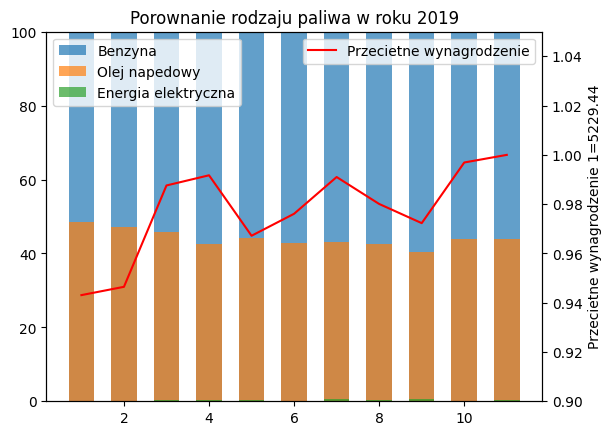

In [354]:
w = 0.6

plt.figure()
plt.ylim(0.0, 100.0)
plt.bar(wynagrodzenie_a_rodzaj_paliwa["miesiac"], 100, w, label="Benzyna", alpha=0.7)
plt.bar(wynagrodzenie_a_rodzaj_paliwa["miesiac"], 
         wynagrodzenie_a_rodzaj_paliwa["procent_energ"] +
        wynagrodzenie_a_rodzaj_paliwa["procent_olejowych"], w, label="Olej napedowy", alpha=0.7)
plt.bar(wynagrodzenie_a_rodzaj_paliwa["miesiac"], 
         wynagrodzenie_a_rodzaj_paliwa["procent_energ"], w,  label="Energia elektryczna", alpha=0.7)
plt.legend(loc="upper left")

axes2 = plt.twinx()
axes2.plot(
        wynagrodzenie_a_rodzaj_paliwa["miesiac"],
        (
        wynagrodzenie_a_rodzaj_paliwa["wynagrodzenia_i_swiadczenia_spoleczne:Przecietne_miesieczne_nominalne_wynagrodzenie_brutto_w_sektorze_przedsiebiorstw__zl_"].astype(float)
        )/np.max(wynagrodzenie_a_rodzaj_paliwa["wynagrodzenia_i_swiadczenia_spoleczne:Przecietne_miesieczne_nominalne_wynagrodzenie_brutto_w_sektorze_przedsiebiorstw__zl_"].astype(float)
      )   
         ,
         label="Przecietne wynagrodzenie",
    color='red'
        )
axes2.set_ylim(0.9,1.05)
axes2.set_ylabel('Przecietne wynagrodzenie 1=5229.44')
plt.legend(loc="upper right")

plt.title("Porownanie rodzaju paliwa w roku 2019")

plt.show()

In [16]:
spark.createDataFrame(wynagrodzenie_a_rodzaj_paliwa).write.csv("hdfs://localhost:8020/user/projekt/visualization/wynagrodzenie_a_rodzaj_paliwa.csv")



/home/vagrant/.local/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


AnalysisException: path hdfs://localhost:8020/user/projekt/visualization/wynagrodzenie_a_rodzaj_paliwa.csv already exists.

In [29]:
wynagrodzenie_a_rodzaj_paliwa.to_csv("/home/vagrant/wynagrodzenie_a_rodzaj_paliwa.csv")


In [17]:
df_marki_many=spark.sql("""
    select 
        marka,
        COUNT(*) as liczba_samochodow
    from 
        mytable
    group by 
        marka
    order by liczba_samochodow desc
    """).toPandas()

marki = list(df_marki_many.head(20)['marka'])

from pyspark.sql.functions import expr
df_marki=spark.sql("""
    select 
         YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac,
        COUNT(*) as """ + marki[0] + """       
    from 
        mytable
    where 
        marka == '""" + marki[0] + """'
    group by 
        rok, miesiac
    """).toPandas()


for marka in marki[1:]:
    if not marka == 'VOLKSWAGEN':
        df_marki = pd.concat([df_marki, 
                            spark.sql("""
    select 
        COUNT(*) as """ + marka.replace('-','_') + """,
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac
    from 
        mytable
    where 
        marka == '""" + marka + """'
    group by 
        rok, miesiac
    """).toPandas()], axis=1)
        
        
        
df_marki=df_marki.T.drop_duplicates().T

df_marki['suma'] = df_marki.iloc[:,2:22].sum(axis=1)
df_marki['suma_5']  = df_marki.iloc[:,2:2+5].sum(axis=1)
df_marki['suma_3']  = df_marki.iloc[:,2:2+3].sum(axis=1)

In [21]:
w = 0.6

values=np.array([1 for i in range(10)])
for i in range(22):
    plt.bar(values)
    values-= df_marki[marki[i]]/df_marki["suma"]
    

plt.figure()
plt.ylim(0.0, 100.0)


plt.bar(df_marki["miesiac"], 1, w, label="Toyota", alpha=0.7)
plt.bar(df_marki["miesiac"], 
        100 - 100*(df_marki["TOYOTA"]/df_marki["suma"])       
        , w, label="OPEL", alpha=0.7)
plt.bar(df_marki["miesiac"], 
        100 - 100*(df_marki["TOYOTA"]/df_marki["suma"])       
        , w, label="OPEL", alpha=0.7)
plt.legend(loc="upper left")


plt.title("Porownanie rodzaju paliwa w roku 2019")

plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

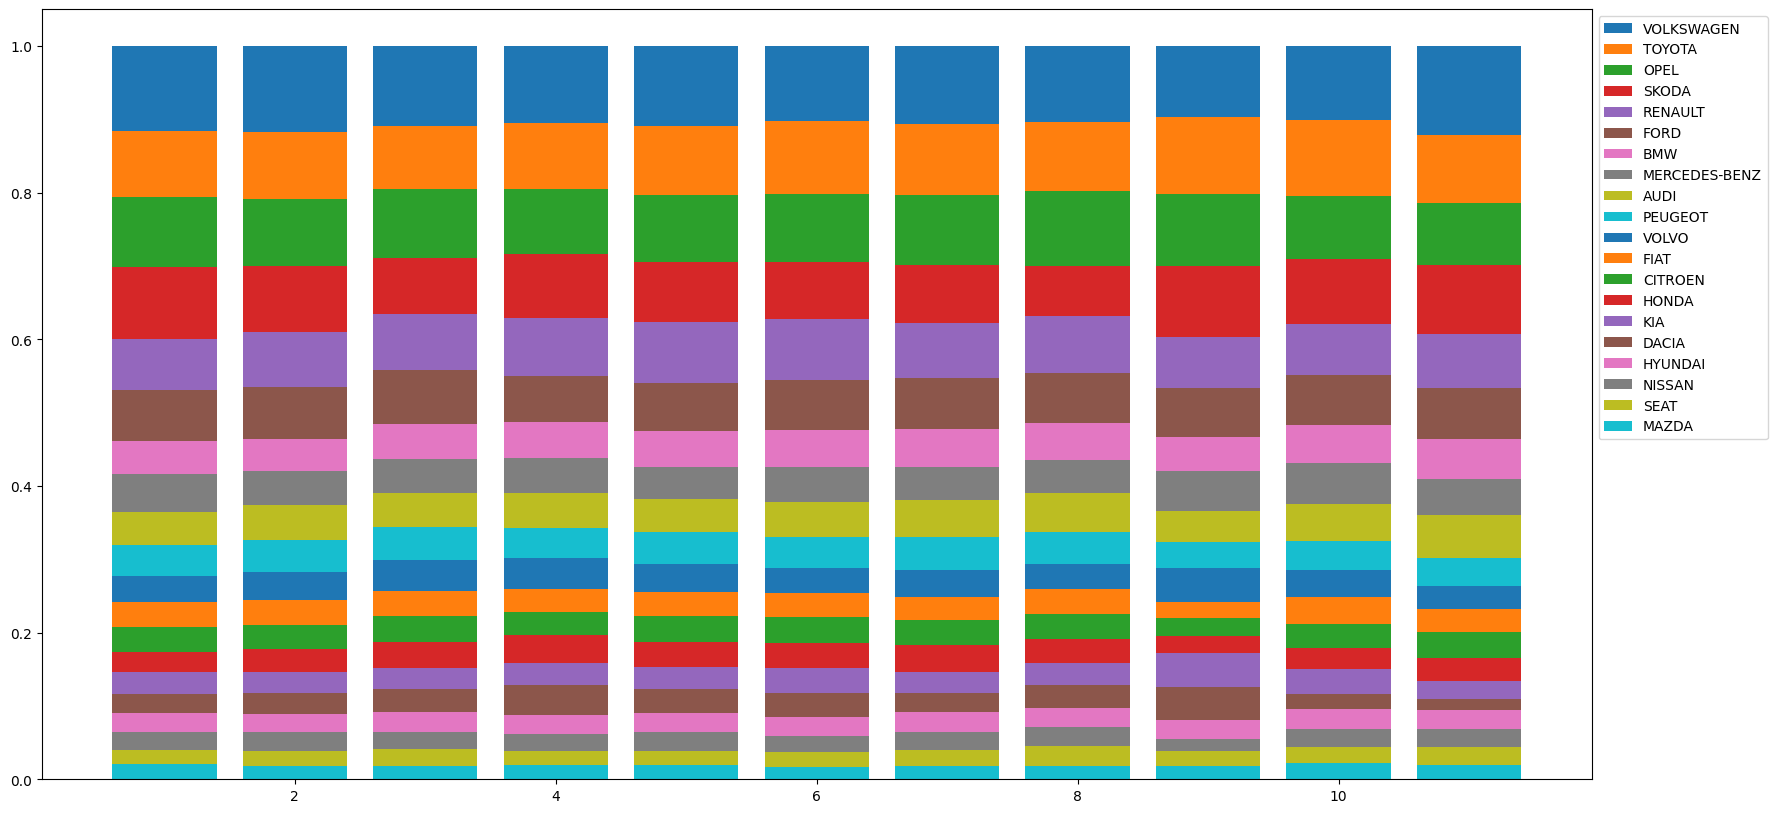

In [22]:

values=np.array([1 for i in range(11)])

plt.figure(figsize=(20,10))
for i in range(20):
    plt.bar(df_marki['miesiac'],  values, label=marki[i])
    values = values - df_marki[marki[i].replace('-','_')]/df_marki["suma"]
    
plt.legend(bbox_to_anchor=(1,1))

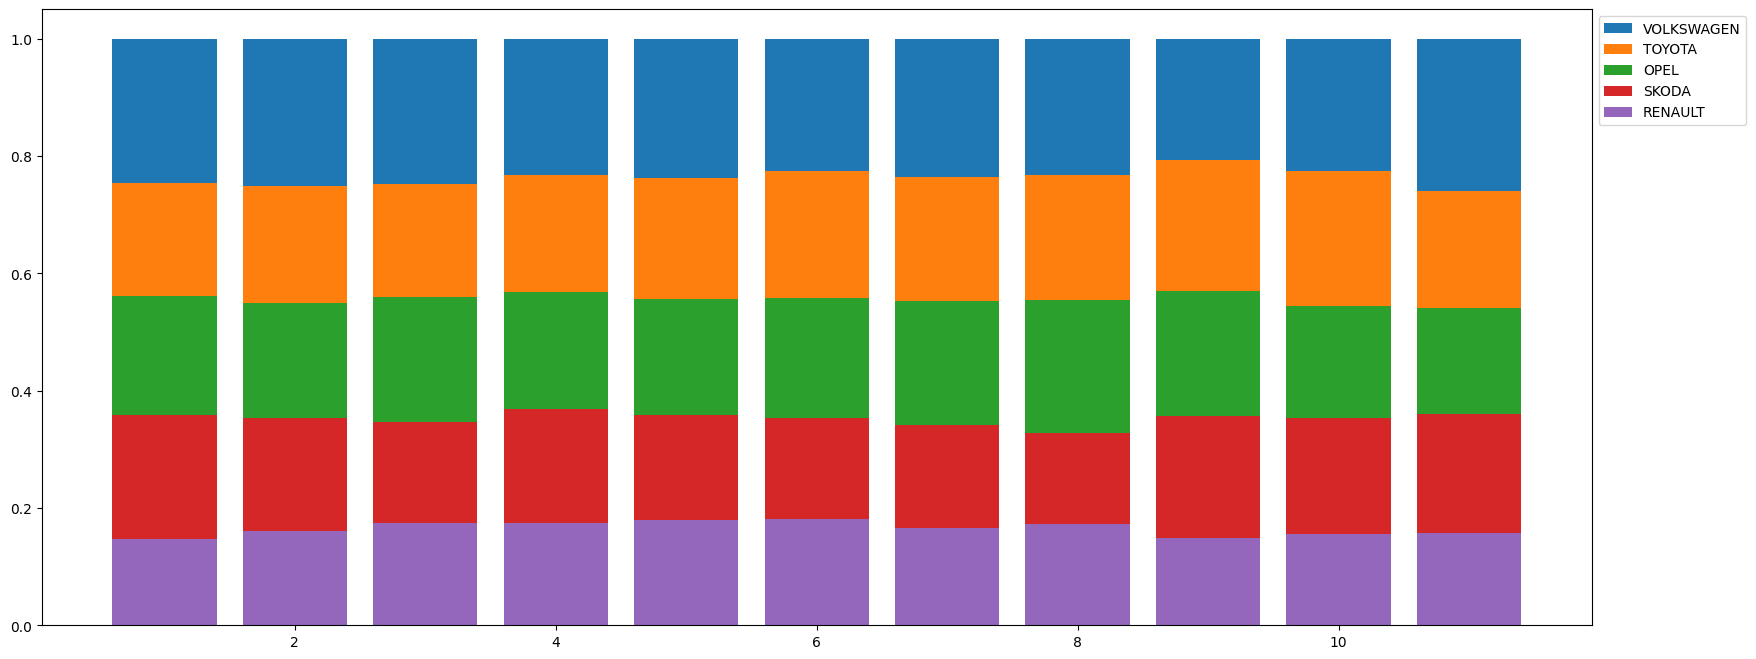

In [23]:

values=np.array([1 for i in range(11)])

plt.figure(figsize=(20, 8))
for i in range(5):
    plt.bar(df_marki['miesiac'],  values, label=marki[i])
    values = values - df_marki[marki[i].replace('-','_')]/df_marki["suma_5"]
    
plt.legend(bbox_to_anchor=(1,1))

In [24]:
df_marki_i_zagraniczne = df_marki.merge( zagraniczne, left_on=['rok', 'miesiac'], right_on=['rok', 'miesiac'])

df_marki_i_zagraniczne = df_marki_i_zagraniczne.sort_values("miesiac")
df_marki_i_zagraniczne = df_marki_i_zagraniczne.reset_index(drop=True)

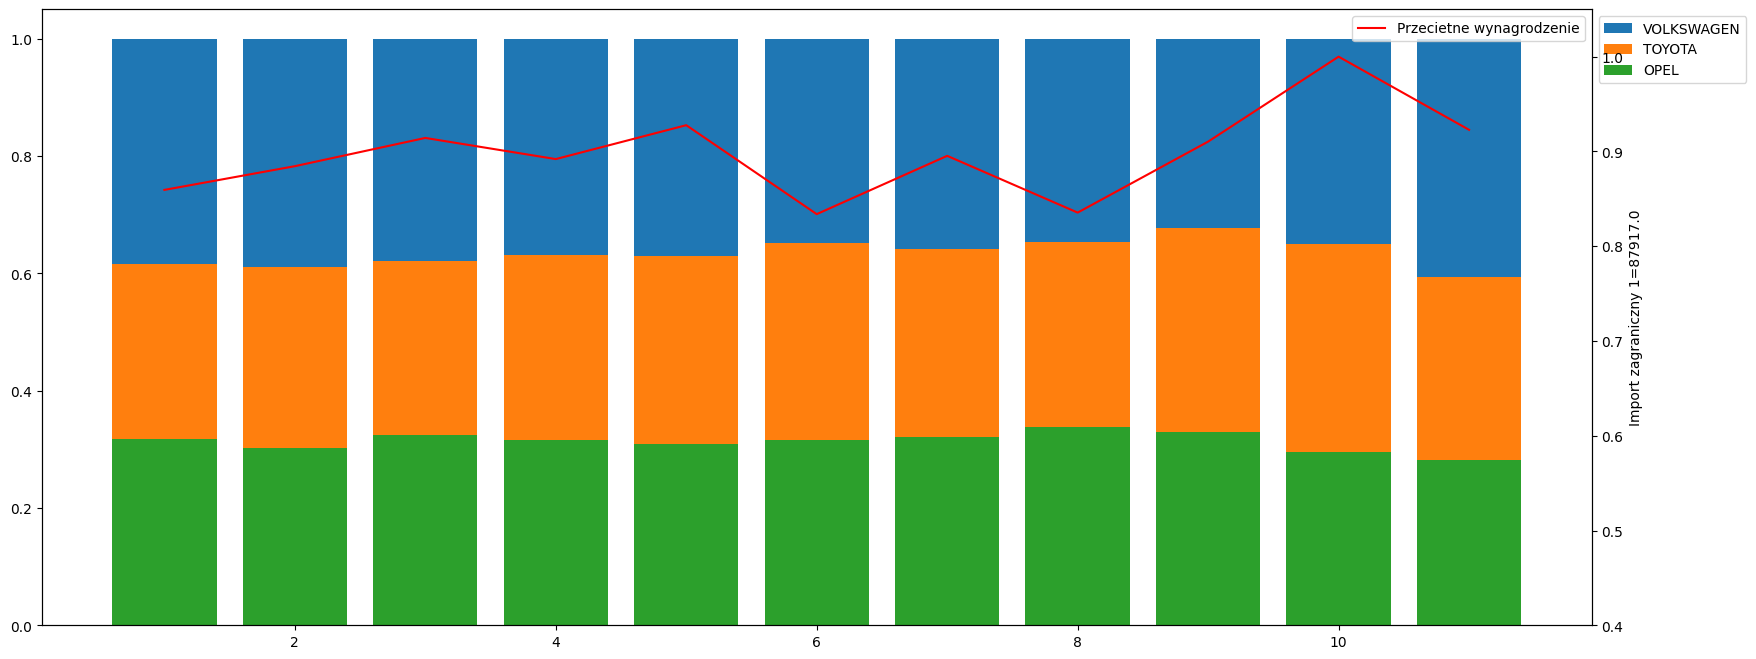

In [25]:
values=np.array([1 for i in range(11)])

plt.figure(figsize=(20, 8))
for i in range(3):
    plt.bar(df_marki_i_zagraniczne['miesiac'],  values, label=marki[i])
    values = values - df_marki_i_zagraniczne[marki[i].replace('-','_')]/df_marki_i_zagraniczne["suma_3"]
    
plt.legend(bbox_to_anchor=(1,1))


axes2 = plt.twinx()
axes2.plot(
        df_marki_i_zagraniczne["miesiac"],
        (
        df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"].astype(float)
        )/np.max(df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"].astype(float)
      )   
         ,
         label="Przecietne wynagrodzenie",
    color='red'
        )
axes2.set_ylim(0.4,1.05)
axes2.set_ylabel('Import zagraniczny 1=87917.0')
plt.legend(loc="upper right")


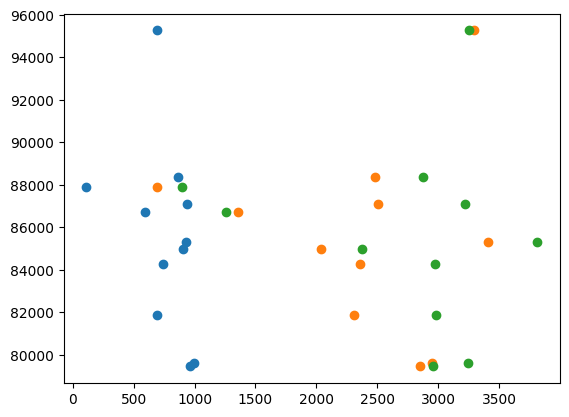

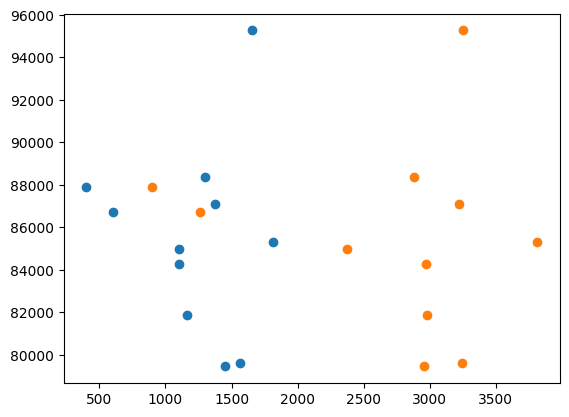

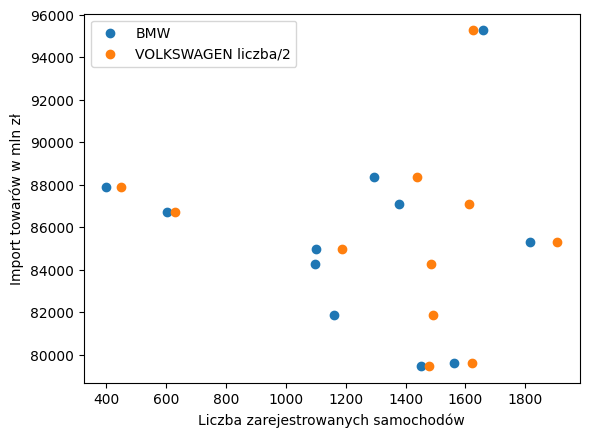

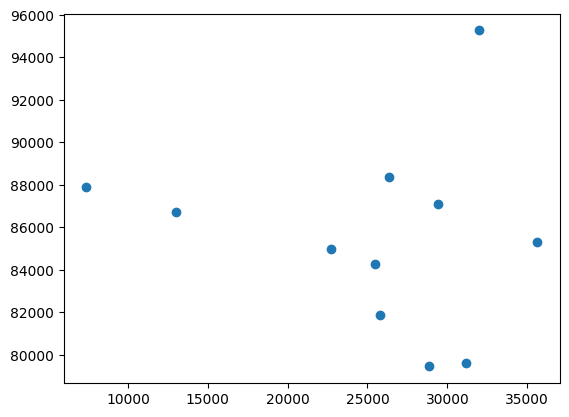

In [26]:
plt.scatter(df_marki_i_zagraniczne["DACIA"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"])
plt.scatter(df_marki_i_zagraniczne["TOYOTA"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"])
plt.scatter(df_marki_i_zagraniczne["VOLKSWAGEN"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"])
plt.show()
plt.scatter(df_marki_i_zagraniczne["BMW"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"],
           label="BMW")
plt.scatter(df_marki_i_zagraniczne["VOLKSWAGEN"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"],
           label="VOLKSWAGEN")
plt.show()
plt.scatter(df_marki_i_zagraniczne["BMW"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"],
           label="BMW")
plt.scatter(df_marki_i_zagraniczne["VOLKSWAGEN"]/2,  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"],
           label="VOLKSWAGEN liczba/2")

plt.xlabel("Liczba zarejestrowanych samochodów")
plt.ylabel("Import towarów w mln zł")
plt.legend()
plt.show()


plt.scatter(df_marki_i_zagraniczne["suma"],  
            df_marki_i_zagraniczne["handel_zagraniczny:Import_towarow__ceny_biezace___mln_zl_"],
           label="VOLKSWAGEN liczba/2")


In [27]:
spark.createDataFrame(df_marki_i_zagraniczne
                     ).write.csv("hdfs://localhost:8020/user/projekt/visualization/marki_a_import_zagraniczny.csv")



/home/vagrant/.local/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


AnalysisException: path hdfs://localhost:8020/user/projekt/visualization/marki_a_import_zagraniczny.csv already exists.

In [28]:
df_marki_i_zagraniczne.to_csv("/home/vagrant/marki_a_import_zagraniczny.csv")

In [30]:
df_uzywanosc_samochodu = spark.sql("""
    select 
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac,
        pochodzenie
    from 
        mytable
    """).toPandas()

In [31]:
wszystkie_samochody = df_uzywanosc_samochodu.groupby(['rok', 'miesiac']).count()

In [32]:
df_nowe_samochody = spark.sql("""
    select 
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac,
        count(*) as nowe
    from 
        mytable
    where
        pochodzenie == 'NOWY IMPORT INDYW' or pochodzenie == 'NOWY ZAKUPIONY W KRAJU'
    group by 
        rok, miesiac
    """).toPandas()

df_uzywane_samochody = spark.sql("""
    select 
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac,
        count(*) as uzywane
    from 
        mytable
    where
        pochodzenie == 'UZYW. IMPORT INDYW' or pochodzenie == 'UZYW. ZAKUPIONY W KRAJU'
    group by 
        rok, miesiac
    """).toPandas()



In [33]:
df_samochody_podzial_na_uzywanie = pd.concat([df_nowe_samochody, df_uzywane_samochody], axis=1).T.drop_duplicates().T

In [34]:


df_samochody_podzial_na_uzywanie

,rok,miesiac,nowe,uzywane
0,2019,10,19157,21397
1,2019,5,18040,17272
2,2019,3,17700,21607
3,2019,8,17941,22534
4,2019,6,18832,19195
5,2019,1,14860,17953
6,2019,2,14621,18739
7,2019,4,15545,14858
8,2019,9,10510,6201
9,2019,7,20817,25396


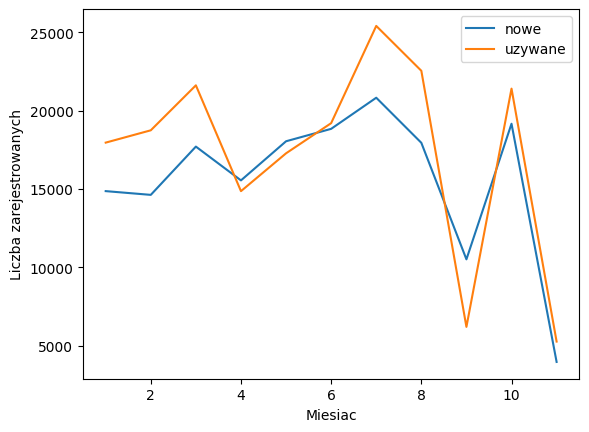

In [35]:
df_samochody_podzial_na_uzywanie = df_samochody_podzial_na_uzywanie.sort_values("miesiac")
df_samochody_podzial_na_uzywanie = df_samochody_podzial_na_uzywanie.reset_index(drop=True)

plt.plot(df_samochody_podzial_na_uzywanie["miesiac"], df_samochody_podzial_na_uzywanie['nowe'], label="nowe")
plt.plot(df_samochody_podzial_na_uzywanie["miesiac"], df_samochody_podzial_na_uzywanie['uzywane'], label="uzywane")
plt.legend()

plt.xlabel("Miesiac")
plt.ylabel("Liczba zarejestrowanych")
plt.show()

In [36]:
BDM_df_sel = BDM_df[BDM_df['rok'] == 2019]
BDM_df_sel = BDM_df_sel.sort_values("miesiac")
BDM_df_sel = BDM_df_sel.reset_index(drop=True)

df_rodzaje = spark.sql("""
    select 
        YEAR(data_rejestracji_ost) as rok,
        MONTH(data_rejestracji_ost) as miesiac,
        count(*) as liczba_rolniczych
    from 
        mytable
    where 
        rodzaj == 'PRZYCZEPA ROLNICZA UNIWERSALNA' or rodzaj == 'CIAGNIK ROLNICZY' or rodzaj == 'PRZYCZEPA CIEZAROWA ROLNICZA'
   group by
       rok, miesiac
   """).toPandas()

df_rodzaje = df_rodzaje.sort_values("miesiac")
df_rodzaje = df_rodzaje.reset_index(drop=True)
df_rodzaje['rok'] = df_rodzaje['rok'].astype(int)
df_rodzaje['miesiac'] = df_rodzaje['miesiac'].astype(int)

rodzaje_rolnicy = pd.concat([df_rodzaje, 
           BDM_df_sel[BDM_df_sel['miesiac']<12][['rok', 'miesiac', 'wynagrodzenia_i_swiadczenia_spoleczne:Przecietna_miesieczna_nominalna_emerytura_i_renta_rolnikow_indywidualnych_brutto__zl_']]
          ],
          axis=1).T.drop_duplicates().T

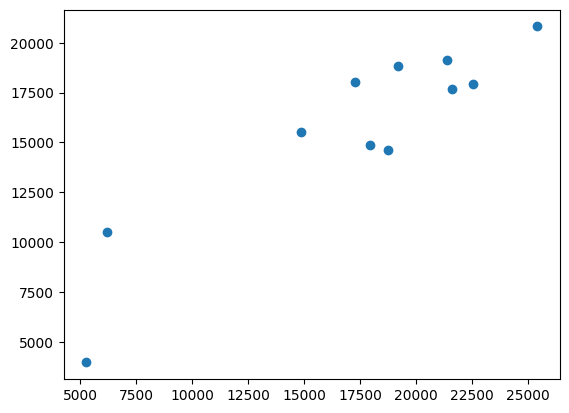

In [37]:
plt.scatter(df_samochody_podzial_na_uzywanie['uzywane'], df_samochody_podzial_na_uzywanie['nowe'])

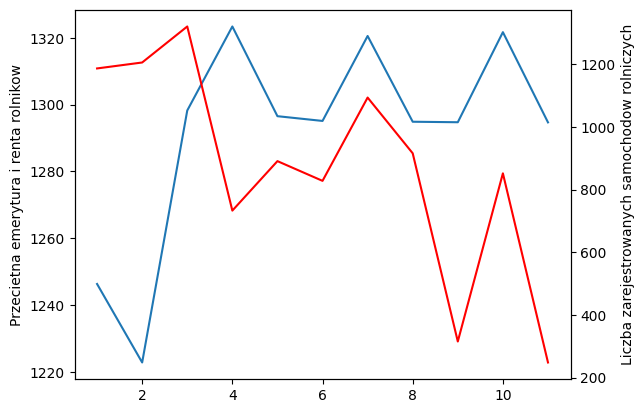

In [38]:
     plt.plot(rodzaje_rolnicy['miesiac'], 
         rodzaje_rolnicy[ 'wynagrodzenia_i_swiadczenia_spoleczne:Przecietna_miesieczna_nominalna_emerytura_i_renta_rolnikow_indywidualnych_brutto__zl_'].astype(float))
plt.ylabel("Przecietna emerytura i renta rolnikow")

axes2 = plt.twinx()
axes2.plot(rodzaje_rolnicy['miesiac'], rodzaje_rolnicy['liczba_rolniczych'], color='r')

plt.xlabel("Miesiac")
plt.ylabel("Liczba zarejestrowanych samochodow rolniczych")

plt.show()
            

In [39]:
spark.createDataFrame(rodzaje_rolnicy
                     ).write.csv("hdfs://localhost:8020/user/projekt/visualization/rodzaje_rolnicy.csv")


/home/vagrant/.local/lib/python3.9/site-packages/pyspark/sql/pandas/conversion.py:331: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


AnalysisException: path hdfs://localhost:8020/user/projekt/visualization/rodzaje_rolnicy.csv already exists.

In [40]:
rodzaje_rolnicy.to_csv("/home/vagrant/rodzaje_rolnicy.csv")